<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/Qiskit_Practice_Lecture_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Qiskit Practice - Lecture 12</font>

## Install Library

In [1]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=4e24a5635d19b0023553d65f0057bafbb83cbf2a442bf7e25fe9925a0c29fc5b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library First

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize

## Access and Run on real device

### Circuit Build

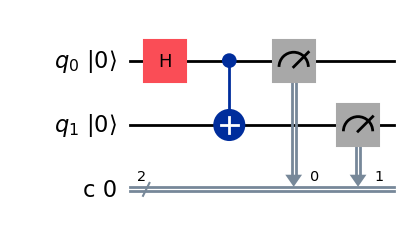

In [ ]:
# create circuit
circuit = QuantumCircuit(2, 2)

# apply gate
circuit.h(0)
circuit.cx(0, 1)

# apply measurement
circuit.measure([0, 1], [0, 1])

# draw circuit
circuit.draw(initial_state=True, output="mpl")

### Run on Simulator

In [ ]:
# select simulator
simulator = AerSimulator()

# save statevector
circuit.save_statevector()

## assemble
qobj = assemble(circuit)

# run
job = simulator.run(circuit)

# monitor job
job_monitor(job)

# get result
result = job.result()

Job Status: job has successfully run


### Result from simulator

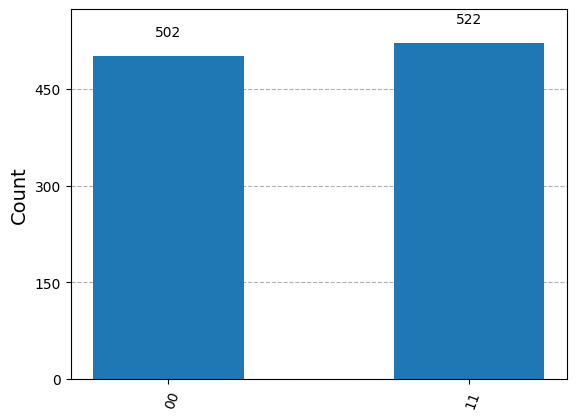

In [ ]:
# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

## Run on real device

In [ ]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="6ae40c57c3cbeb90728f448dacdf19cae71b887c1b90dede86ee5be508931274be73b8cb6c9a755a9afda3a704736e4c92be7eaf31ddc9ffdc1f7d66be82150f", overwrite=True, set_as_default=True)

#service = QiskitRuntimeService(channel="ibm_cloud")

service = QiskitRuntimeService(channel="ibm_quantum")

#service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True, min_num_qubits=100)

t_qc = transpile(circuit, backend=backend, optimization_level=3)

job = backend.run(t_qc)
while job.status().name != 'DONE':
    print(f"Job Status: {job.status().name}")
    time.sleep(10)  # Check status every 10 seconds

# Get the result once the job is done
result = job.result()
print(result)

Job Status: QUEUED
Job Status: RUNNING
Result(backend_name='ibm_sherbrooke', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1866, '0x3': 1964, '0x2': 100, '0x1': 70}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q'

### Result from Real Devices

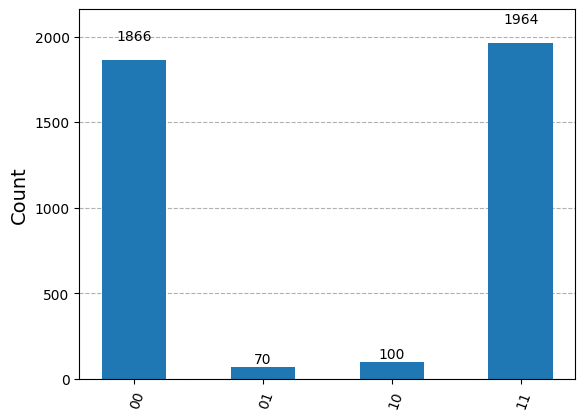

In [ ]:
# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

## Entanglement

### Build Circuit

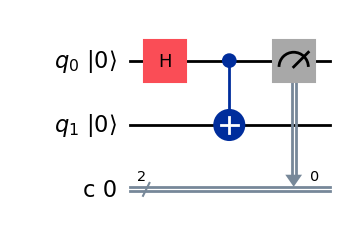

In [ ]:
# create circuit
circuit = QuantumCircuit(2, 2)

# apply gate
circuit.h(0)
circuit.cx(0, 1)

# apply measurement
circuit.measure([0], [0])

# draw circuit
circuit.draw(initial_state=True, output="mpl")

### Run on Simulator

In [ ]:
# select simulator
simulator = AerSimulator()

# save statevector
circuit.save_statevector()

## assemble
qobj = assemble(circuit)

# run
job = simulator.run(circuit)

# monitor job
job_monitor(job)

# get result
result = job.result()

Job Status: job has successfully run


### State Vector

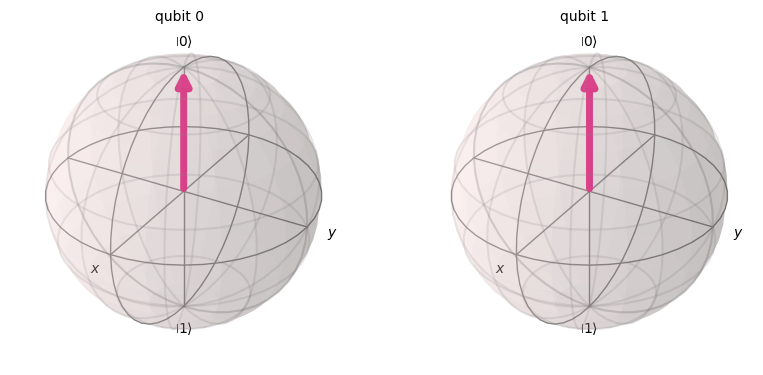

In [ ]:
# get statevector
final_state = result.get_statevector()

# plot statevector
plot_bloch_multivector(final_state)

## Heisenberg's Uncertainity Principle

=> Initialize a qubit in state |0> / Z basis / standard basis / computational basis\
=> measure in Z basis\
=> measure in X basis\
=> measure in Y basis

### Build Circuit initialize on Z basis

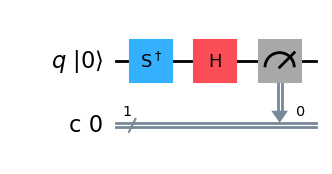

In [10]:
# create circuit
circuit = QuantumCircuit(1, 1)

# apply measurement
#for Z basis
#circuit.measure(0, 0)

#for X basis
#circuit.h(0)
#circuit.measure(0, 0)

# for Y basis
circuit.sdg(0)
circuit.h(0)
circuit.measure(0, 0)

# draw circuit
circuit.draw(initial_state=True, output="mpl")

### Run on Simulator

In [11]:
# select simulator
simulator = AerSimulator()

# save statevector
circuit.save_statevector()

## assemble
qobj = assemble(circuit)

# run
job = simulator.run(circuit)

# monitor job
job_monitor(job)

# get result
result = job.result()

Job Status: job has successfully run


### Result from Simulator

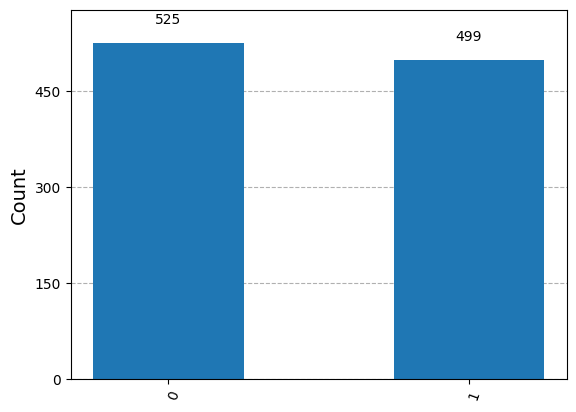

In [12]:
# get counts
counts = result.get_counts()

# plot histogram
plot_histogram(counts)

## Quantum Teleportation

### Teleportation Circuit

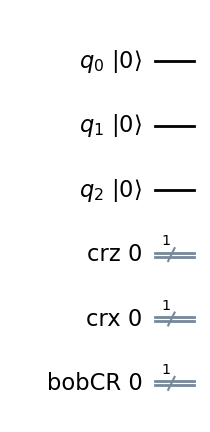

In [29]:
# quantum register
qr = QuantumRegister(3, name='q')

# classical register
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
bobCR = ClassicalRegister(1, name='bobCR')

# quantum circuit
teleportation_circuit = QuantumCircuit(qr, crz, crx, bobCR)

teleportation_circuit.draw(initial_state=True, output='mpl')

### Create a random state

<IPython.core.display.Latex object>

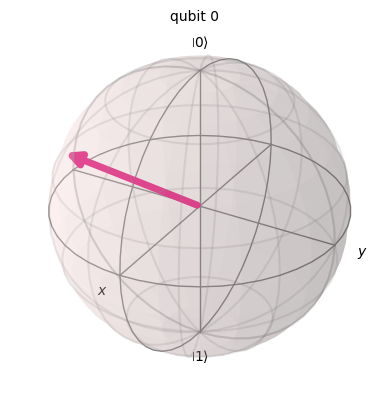

In [30]:
psi = random_statevector(2)

display(array_to_latex(psi))

init_gate = Initialize(psi)
init_gate.label = 'psi'

plot_bloch_multivector(psi)

### Assign to Alice Qubit

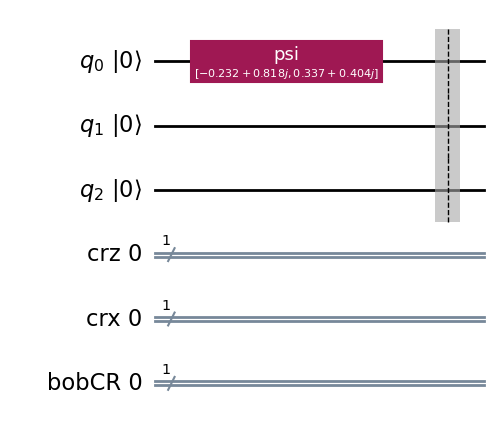

In [31]:
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()
teleportation_circuit.draw(initial_state=True, output='mpl')

### Entangled Pair

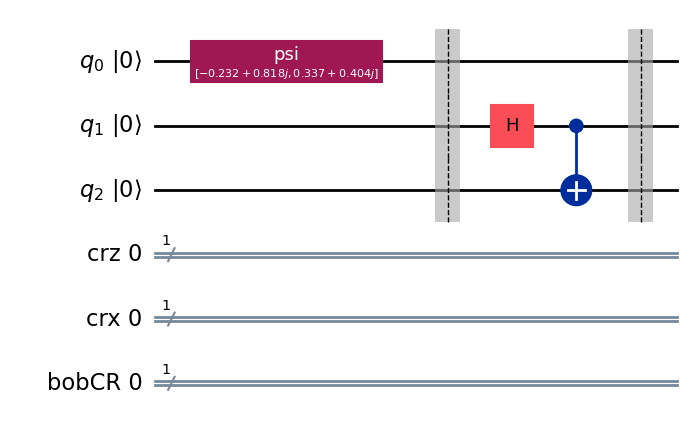

In [32]:
teleportation_circuit.h(1)
teleportation_circuit.cx(1, 2)
teleportation_circuit.barrier()
teleportation_circuit.draw(initial_state=True, output='mpl')

### Alice performs some operations to her qubit

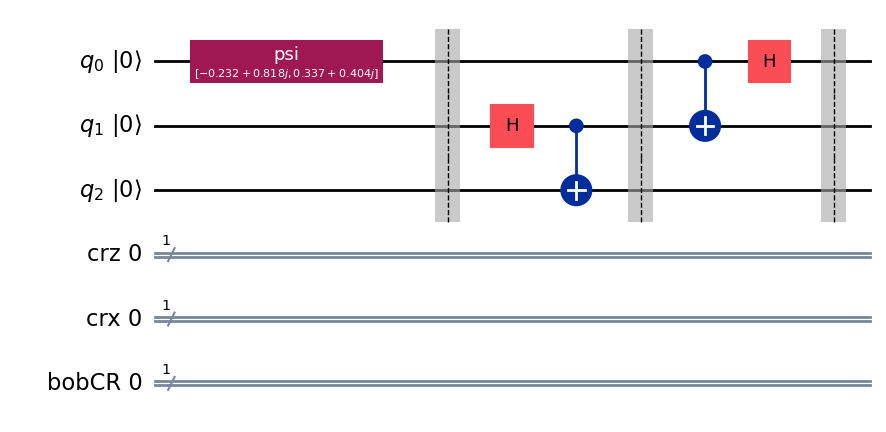

In [33]:
teleportation_circuit.cx(0, 1)
teleportation_circuit.h(0)
teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True, output='mpl')

### Create a copy of the circuit

In [34]:
import copy

second_teleportation_circuit = copy.deepcopy(teleportation_circuit)

### Alice applies measurement

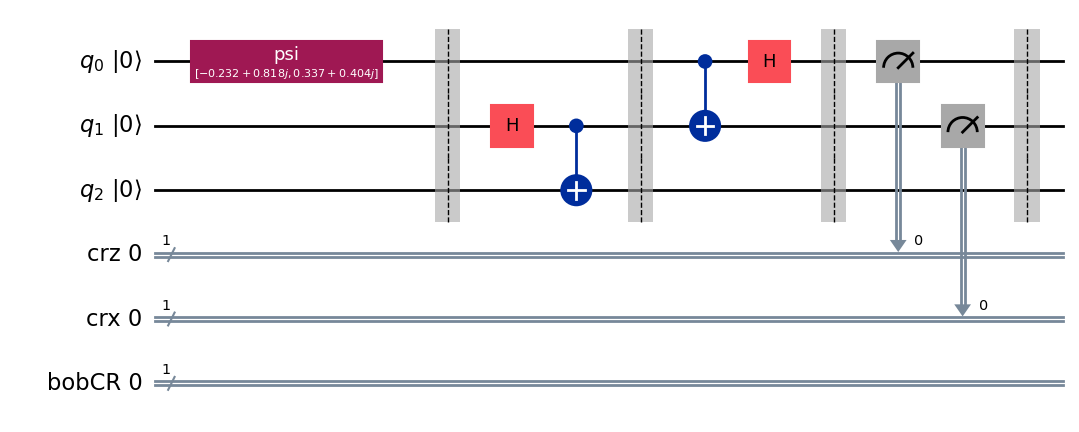

In [35]:
teleportation_circuit.measure(0, crz)
teleportation_circuit.measure(1, crx)

teleportation_circuit.barrier()

teleportation_circuit.draw(initial_state=True, output='mpl')

### After Break